# Phase 1 - Neural Networks

In [ ]:
import torch
import torch.nn as nn
import torchvision.datasets as datasets
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import numpy as np

## Test Function

In [ ]:
def test_accuracy(model, test_loader, input_size, device=None):
    if device is not None:
        model.to(device)
    else:
        device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
        model.to(device)
    correct = 0
    total = 0
    with torch.no_grad():
        for test_data in test_loader:
            images, labels = test_data[0].cuda(), test_data[1].cuda()
            images = images.view(-1, input_size)
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print('Accuracy of the network on the test images: %d %%' % (100 * correct / total))


## Train Function
Please refer to the train function in MNIST_Classifier.ipynb to complete this function. You will need to store the store the loss and accuracies per iteration to plot. Please print the loss, accuracy and time taken for training each epoch.

2.1 Learning Curve
Question What is a Learning curve and why is it useful? Plot the learning curve and explain.
A learning curve is a rate of progression in which the model learns. It is useful in this case because we want our model to be able to adapt and learn to the data we are feeding it. We don't want it to be fixed or uniform so that we are minimizing our loss and maximizing our accuracy. 

In [ ]:
def train(model, loss_fn, optimizer, train_loader, batch_size, num_epochs, input_size, stat_count=100, device=None):
    list_loss= []
    list_accuracy = []
    iteration_loss = 0.0
    total_sum = 0
    right = 0
    if device is not None:
        model.to(device)
    else:
        device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
        model.to(device)
    # Iterate through all Epochs
    for epoch in range(num_epochs):
        # Iterate through training dataset
        for i, data in enumerate(train_loader, 0):
            # Flatten images and load images/labels onto GPU
            images, labels = data[0].to(device), data[1].to(device)
            images = images.view(-1, input_size)
            # Zero collected gradients at each step
            optimizer.zero_grad()
            # Forward Propagate
            outputs = model(images)
            # Calculate Loss
            loss = loss_fn(outputs, labels)
            # Back propagate
            loss.backward()
            # Update weights
            optimizer.step()
            
            # Print statistics on every stat_count iteration
            if (i+1) % stat_count == 0:
              iteration_loss += loss.item() * images.size(0)
              list_loss.append(iteration_loss)
              iteration_loss = 0.0
              optimizer.step()
              _, predicted = torch.max(outputs.data, 1)
              total_sum = total_sum + labels.size(0)
              right += (predicted == labels).sum().item()
              list_accuracy.append((100* right/total_sum))
              #Print out the epochs
              print('Epoch [%d/%d], Step [%d/%d], Loss: %.4f, Accuracy: %.4f'           
                          %(epoch+1, num_epochs, i+1, 
                          len(train_loader), loss.item(),(100* right/total_sum)))
    return list_loss, list_accuracy

## Plot Learning Curves Function
Plot the loss and accuracies from training

2.2 Learning Rate
Question For each learning rate, explain if the model is underfitting, overfitting, or is training
well. Explain the difference between high learning rates and low learning rates in terms of the
optimization process.

In [ ]:
def plot_learning_curve(list_loss, list_accuracy):
    fig, (ax1, ax2) = plt.subplots(2, sharex=True)
    ax1.plot(list_loss)
    ax1.set_title ('Loss')
    ax2.plot(list_accuracy)
    ax2.set_title ('Accuracy')
    
    

## Downloading MNIST

In [ ]:
train_data = datasets.MNIST(root = './data', train = True,
                        transform = transforms.ToTensor(), download = True)

test_data = datasets.MNIST(root = './data', train = False,
                       transform = transforms.ToTensor())

In [ ]:
batch_size = 100 

train_loader = torch.utils.data.DataLoader(dataset = train_data,
                                             batch_size = batch_size,
                                             shuffle = True)

test_loader = torch.utils.data.DataLoader(dataset = test_data,
                                      batch_size = batch_size, 
                                      shuffle = False)

## Train, Evaluate on 1-Layer Model & Parameter Tuning
Here, you can test changing the different paramters and see the effect on training. Please follow the Lab 3 assignment. Feel free to create seperate code cells for testing the different paramters

In [ ]:
import torch
torch.cuda.empty_cache()

Epoch [1/5], Step [100/600], Loss: 0.2744, Accuracy: 92.0000
Epoch [1/5], Step [200/600], Loss: 0.4164, Accuracy: 89.5000
Epoch [1/5], Step [300/600], Loss: 0.0797, Accuracy: 91.6667
Epoch [1/5], Step [400/600], Loss: 0.1555, Accuracy: 92.5000
Epoch [1/5], Step [500/600], Loss: 0.1493, Accuracy: 93.0000
Epoch [1/5], Step [600/600], Loss: 0.1827, Accuracy: 93.3333
Epoch [2/5], Step [100/600], Loss: 0.0992, Accuracy: 93.8571
Epoch [2/5], Step [200/600], Loss: 0.0356, Accuracy: 94.5000
Epoch [2/5], Step [300/600], Loss: 0.0763, Accuracy: 94.7778
Epoch [2/5], Step [400/600], Loss: 0.2280, Accuracy: 94.8000
Epoch [2/5], Step [500/600], Loss: 0.0795, Accuracy: 95.1818
Epoch [2/5], Step [600/600], Loss: 0.1031, Accuracy: 95.4167
Epoch [3/5], Step [100/600], Loss: 0.1025, Accuracy: 95.5385
Epoch [3/5], Step [200/600], Loss: 0.0934, Accuracy: 95.6429
Epoch [3/5], Step [300/600], Loss: 0.0477, Accuracy: 95.8667
Epoch [3/5], Step [400/600], Loss: 0.1780, Accuracy: 95.8750
Epoch [3/5], Step [500/6

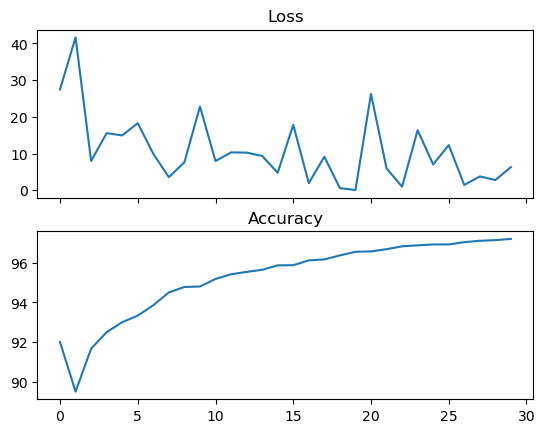

In [ ]:
# Define Parameters
input_size = 784
num_classes = 10 
lr = 0.01
num_epochs = 5

# Create a 1-Layer Neural Network called Net
class Net(nn.Module):
    def __init__(self, input_size, num_classes):
        super(Net,self).__init__()
        self.fc1 = nn.Linear(input_size, 500)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(500, num_classes)
  
    def forward(self,x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# Instantiate Model
net = Net(input_size, num_classes)
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
net.to(device)

# Define Loss func and Optimizer
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=lr)

# Train Model
list_loss, list_accuracy = train(model=net, loss_fn=loss_function, optimizer=optimizer, train_loader=train_loader, batch_size=batch_size, num_epochs=num_epochs, input_size=input_size)

# Plot Learning Curves
plot_learning_curve(list_loss = list_loss, list_accuracy = list_accuracy)

# Evaluate on Test Set
test_accuracy(model=net, test_loader=test_loader, input_size=input_size) 

2.2 Learning Rate 2e-3
The model is training well and achieving the highest accuracy.

Epoch [1/5], Step [100/600], Loss: 0.3238, Accuracy: 90.0000
Epoch [1/5], Step [200/600], Loss: 0.1809, Accuracy: 91.0000
Epoch [1/5], Step [300/600], Loss: 0.2090, Accuracy: 93.0000
Epoch [1/5], Step [400/600], Loss: 0.1938, Accuracy: 93.7500
Epoch [1/5], Step [500/600], Loss: 0.1408, Accuracy: 93.6000
Epoch [1/5], Step [600/600], Loss: 0.0924, Accuracy: 94.1667
Epoch [2/5], Step [100/600], Loss: 0.0793, Accuracy: 94.7143
Epoch [2/5], Step [200/600], Loss: 0.0742, Accuracy: 95.2500
Epoch [2/5], Step [300/600], Loss: 0.0998, Accuracy: 95.3333
Epoch [2/5], Step [400/600], Loss: 0.0579, Accuracy: 95.6000
Epoch [2/5], Step [500/600], Loss: 0.0853, Accuracy: 95.6364
Epoch [2/5], Step [600/600], Loss: 0.1435, Accuracy: 95.5833
Epoch [3/5], Step [100/600], Loss: 0.0235, Accuracy: 95.9231
Epoch [3/5], Step [200/600], Loss: 0.0399, Accuracy: 96.0714
Epoch [3/5], Step [300/600], Loss: 0.0446, Accuracy: 96.2000
Epoch [3/5], Step [400/600], Loss: 0.0317, Accuracy: 96.3125
Epoch [3/5], Step [500/6

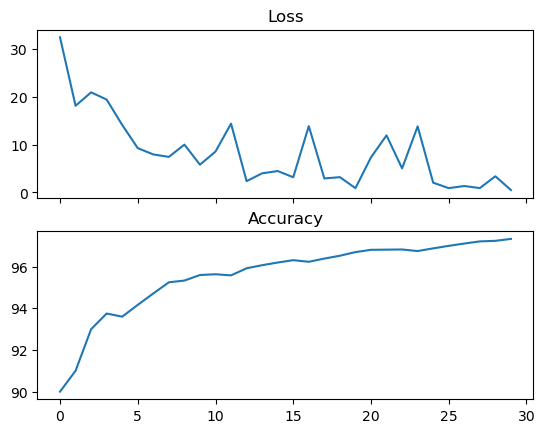

In [ ]:
# Define Parameters LEARNING 2e-3
input_size = 784
num_classes = 10 
lr = 2e-3
num_epochs = 5

# Create a 1-Layer Neural Network called Net
class Net(nn.Module):
    def __init__(self, input_size, num_classes):
        super(Net,self).__init__()
        self.fc1 = nn.Linear(input_size, 500)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(500, num_classes)
  
    def forward(self,x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# Instantiate Model
net = Net(input_size, num_classes)
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
net.to(device)

# Define Loss func and Optimizer
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=lr)

# Train Model
list_loss, list_accuracy = train(model=net, loss_fn=loss_function, optimizer=optimizer, train_loader=train_loader, batch_size=batch_size, num_epochs=num_epochs, input_size=input_size)

# Plot Learning Curves
plot_learning_curve(list_loss = list_loss, list_accuracy = list_accuracy)

# Evaluate on Test Set
test_accuracy(model=net, test_loader=test_loader, input_size=input_size) 

2.2 Learning Rate 3e-4
The learning rate is too low to the point where the model is underfitting to the training data. It resulted in less accuracy than the 2e-3 rate.

Epoch [1/5], Step [100/600], Loss: 0.6640, Accuracy: 80.0000
Epoch [1/5], Step [200/600], Loss: 0.4431, Accuracy: 82.5000
Epoch [1/5], Step [300/600], Loss: 0.3394, Accuracy: 85.3333
Epoch [1/5], Step [400/600], Loss: 0.2653, Accuracy: 87.0000
Epoch [1/5], Step [500/600], Loss: 0.2777, Accuracy: 87.4000
Epoch [1/5], Step [600/600], Loss: 0.1568, Accuracy: 88.8333
Epoch [2/5], Step [100/600], Loss: 0.1731, Accuracy: 89.7143
Epoch [2/5], Step [200/600], Loss: 0.3711, Accuracy: 90.1250
Epoch [2/5], Step [300/600], Loss: 0.2832, Accuracy: 90.6667
Epoch [2/5], Step [400/600], Loss: 0.2115, Accuracy: 91.0000
Epoch [2/5], Step [500/600], Loss: 0.0985, Accuracy: 91.4545
Epoch [2/5], Step [600/600], Loss: 0.2314, Accuracy: 91.5000
Epoch [3/5], Step [100/600], Loss: 0.1320, Accuracy: 91.7692
Epoch [3/5], Step [200/600], Loss: 0.1930, Accuracy: 91.8571
Epoch [3/5], Step [300/600], Loss: 0.1546, Accuracy: 92.0000
Epoch [3/5], Step [400/600], Loss: 0.0824, Accuracy: 92.3750
Epoch [3/5], Step [500/6

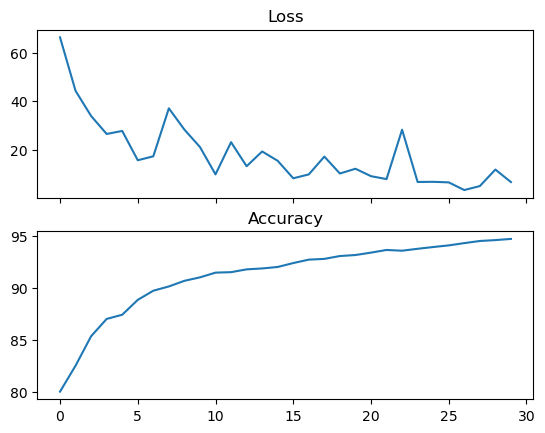

In [ ]:
# Define Parameters LEARNING 3e-4
input_size = 784
num_classes = 10 
lr = 3e-4
num_epochs = 5

# Create a 1-Layer Neural Network called Net
class Net(nn.Module):
    def __init__(self, input_size, num_classes):
        super(Net,self).__init__()
        self.fc1 = nn.Linear(input_size, 500)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(500, num_classes)
  
    def forward(self,x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# Instantiate Model
net = Net(input_size, num_classes)
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
net.to(device)

# Define Loss func and Optimizer
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=lr)

# Train Model
list_loss, list_accuracy = train(model=net, loss_fn=loss_function, optimizer=optimizer, train_loader=train_loader, batch_size=batch_size, num_epochs=num_epochs, input_size=input_size)

# Plot Learning Curves
plot_learning_curve(list_loss, list_accuracy)

# Evaluate on Test Set
test_accuracy(model=net, test_loader=test_loader, input_size=input_size) 

2.2 Learning Rate 5e-2
The learning rate is way too high that the model is overfitting to the training data. It resulted in significantly less accuracy of 90%

Epoch [1/5], Step [100/600], Loss: 0.4253, Accuracy: 87.0000
Epoch [1/5], Step [200/600], Loss: 0.3239, Accuracy: 88.0000
Epoch [1/5], Step [300/600], Loss: 0.2664, Accuracy: 89.3333
Epoch [1/5], Step [400/600], Loss: 0.2823, Accuracy: 90.0000
Epoch [1/5], Step [500/600], Loss: 0.2554, Accuracy: 90.4000
Epoch [1/5], Step [600/600], Loss: 0.1969, Accuracy: 91.0000
Epoch [2/5], Step [100/600], Loss: 0.3146, Accuracy: 90.7143
Epoch [2/5], Step [200/600], Loss: 0.2161, Accuracy: 91.3750
Epoch [2/5], Step [300/600], Loss: 0.1671, Accuracy: 91.8889
Epoch [2/5], Step [400/600], Loss: 0.3385, Accuracy: 91.8000
Epoch [2/5], Step [500/600], Loss: 0.1939, Accuracy: 92.0000
Epoch [2/5], Step [600/600], Loss: 0.4194, Accuracy: 91.9167
Epoch [3/5], Step [100/600], Loss: 0.3261, Accuracy: 92.0000
Epoch [3/5], Step [200/600], Loss: 0.4421, Accuracy: 91.7857
Epoch [3/5], Step [300/600], Loss: 0.4073, Accuracy: 91.7333
Epoch [3/5], Step [400/600], Loss: 0.2847, Accuracy: 91.6250
Epoch [3/5], Step [500/6

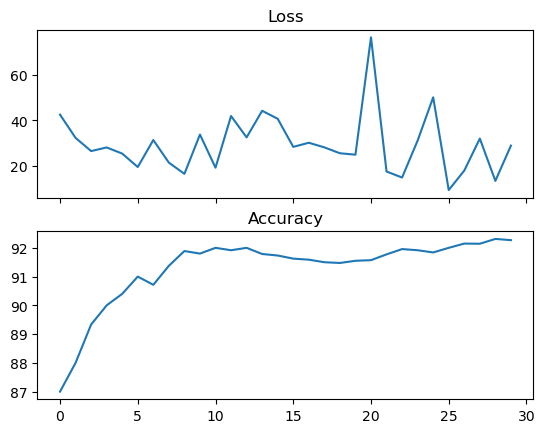

In [ ]:
# Define Parameters LEARNING 5e-2
input_size = 784
num_classes = 10 
lr = 5e-2
num_epochs = 5

# Create a 1-Layer Neural Network called Net
class Net(nn.Module):
    def __init__(self, input_size, num_classes):
        super(Net,self).__init__()
        self.fc1 = nn.Linear(input_size, 500)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(500, num_classes)
  
    def forward(self,x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# Instantiate Model
net = Net(input_size, num_classes)
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
net.to(device)

# Define Loss func and Optimizer
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=lr)

# Train Model
list_loss, list_accuracy = train(model=net, loss_fn=loss_function, optimizer=optimizer, train_loader=train_loader, batch_size=batch_size, num_epochs=num_epochs, input_size=input_size)

# Plot Learning Curves
plot_learning_curve(list_loss = list_loss, list_accuracy = list_accuracy)

# Evaluate on Test Set
test_accuracy(model=net, test_loader=test_loader, input_size=input_size) 

2.3 Comparing SGD and SGD + Momentum to Adam
The stochastic gradient descent is less effective and more inaccurate than Adam showing 90%. However, applying a momentum of 0.9 increased its accuracy to 96%, but is still slightly inaccurate compared to 97%.

2.3 Optimizer Stochastic Gradient Descent 

Epoch [1/5], Step [100/600], Loss: 2.0501, Accuracy: 72.0000
Epoch [1/5], Step [200/600], Loss: 1.6319, Accuracy: 74.0000
Epoch [1/5], Step [300/600], Loss: 1.3079, Accuracy: 76.6667
Epoch [1/5], Step [400/600], Loss: 1.1816, Accuracy: 75.2500
Epoch [1/5], Step [500/600], Loss: 0.8628, Accuracy: 77.4000
Epoch [1/5], Step [600/600], Loss: 0.8161, Accuracy: 78.1667
Epoch [2/5], Step [100/600], Loss: 0.5859, Accuracy: 79.8571
Epoch [2/5], Step [200/600], Loss: 0.6841, Accuracy: 80.5000
Epoch [2/5], Step [300/600], Loss: 0.5257, Accuracy: 81.3333
Epoch [2/5], Step [400/600], Loss: 0.5791, Accuracy: 81.7000
Epoch [2/5], Step [500/600], Loss: 0.4610, Accuracy: 82.2727
Epoch [2/5], Step [600/600], Loss: 0.5043, Accuracy: 82.9167
Epoch [3/5], Step [100/600], Loss: 0.4365, Accuracy: 83.5385
Epoch [3/5], Step [200/600], Loss: 0.4837, Accuracy: 83.7143
Epoch [3/5], Step [300/600], Loss: 0.5320, Accuracy: 83.6667
Epoch [3/5], Step [400/600], Loss: 0.4232, Accuracy: 83.9375
Epoch [3/5], Step [500/6

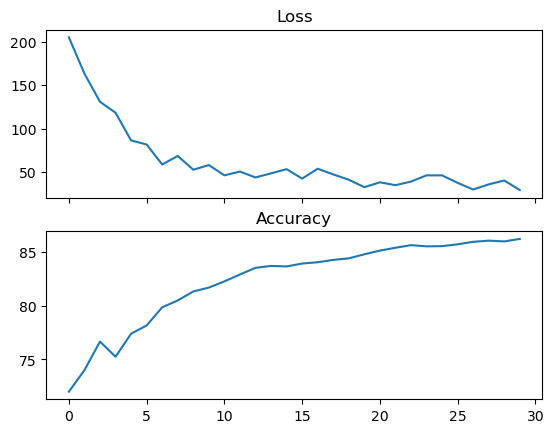

In [ ]:
# Define Parameters
input_size = 784
num_classes = 10 
lr = 0.01
num_epochs = 5

# Create a 1-Layer Neural Network called Net
class Net(nn.Module):
    def __init__(self, input_size, num_classes):
        super(Net,self).__init__()
        self.fc1 = nn.Linear(input_size, 500)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(500, num_classes)
  
    def forward(self,x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# Instantiate Model
net = Net(input_size, num_classes)
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
net.to(device)

# Define Loss func and Optimizer
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=lr)

# Train Model
list_loss, list_accuracy = train(model=net, loss_fn=loss_function, optimizer=optimizer, train_loader=train_loader, batch_size=batch_size, num_epochs=num_epochs, input_size=input_size)

# Plot Learning Curves
plot_learning_curve(list_loss = list_loss, list_accuracy = list_accuracy)

# Evaluate on Test Set
test_accuracy(model=net, test_loader=test_loader, input_size=input_size) 

2.3 Optimizer Stochastic Gradient Descent with momentum 0.9

Epoch [1/5], Step [100/600], Loss: 0.5488, Accuracy: 90.0000
Epoch [1/5], Step [200/600], Loss: 0.5364, Accuracy: 87.5000
Epoch [1/5], Step [300/600], Loss: 0.2946, Accuracy: 88.6667
Epoch [1/5], Step [400/600], Loss: 0.3146, Accuracy: 89.0000
Epoch [1/5], Step [500/600], Loss: 0.3093, Accuracy: 89.6000
Epoch [1/5], Step [600/600], Loss: 0.2843, Accuracy: 89.1667
Epoch [2/5], Step [100/600], Loss: 0.3326, Accuracy: 89.4286
Epoch [2/5], Step [200/600], Loss: 0.1996, Accuracy: 90.1250
Epoch [2/5], Step [300/600], Loss: 0.2413, Accuracy: 90.5556
Epoch [2/5], Step [400/600], Loss: 0.2276, Accuracy: 90.6000
Epoch [2/5], Step [500/600], Loss: 0.1746, Accuracy: 91.0000
Epoch [2/5], Step [600/600], Loss: 0.1668, Accuracy: 91.3333
Epoch [3/5], Step [100/600], Loss: 0.1699, Accuracy: 91.6154
Epoch [3/5], Step [200/600], Loss: 0.2032, Accuracy: 91.7143
Epoch [3/5], Step [300/600], Loss: 0.2331, Accuracy: 91.7333
Epoch [3/5], Step [400/600], Loss: 0.1629, Accuracy: 91.9375
Epoch [3/5], Step [500/6

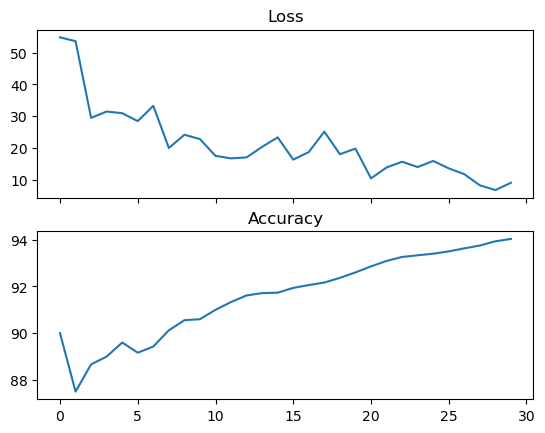

In [ ]:
# Define Parameters
input_size = 784
num_classes = 10 
lr = 0.01
num_epochs = 5

# Create a 1-Layer Neural Network called Net
class Net(nn.Module):
    def __init__(self, input_size, num_classes):
        super(Net,self).__init__()
        self.fc1 = nn.Linear(input_size, 500)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(500, num_classes)
  
    def forward(self,x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# Instantiate Model
net = Net(input_size, num_classes)
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
net.to(device)

# Define Loss func and Optimizer
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=lr, momentum = 0.9)

# Train Model
list_loss, list_accuracy = train(model=net, loss_fn=loss_function, optimizer=optimizer, train_loader=train_loader, batch_size=batch_size, num_epochs=num_epochs, input_size=input_size)

# Plot Learning Curves
plot_learning_curve(list_loss = list_loss, list_accuracy = list_accuracy)

# Evaluate on Test Set
test_accuracy(model=net, test_loader=test_loader, input_size=input_size) 

2.4 Initializing Weights (Zero, One's, Random)

Question How is the training process affected when we initialize our network weights differently?
Based on what you observe, give a recommendation as to how weights should be initialized. Explain
your reasoning.

It was difficult for me to figure this out online on my own, but I believe that having weights at 0 makes it difficult for the neural network to learn, having very large fluctuations. Having weights at 1 doesn't do much to improve the output. Having the weights randomized between 0 and 1 seems to allow flexibility for the neural network to learn and adjust its weights accordingly as it runs through more epochs.

Zero Weights

In [ ]:
# Define Parameters
input_size = 784
num_classes = 10 
lr = 0.01
num_epochs = 5

# Create a 1-Layer Neural Network called Net
class Net(nn.Module):
    def __init__(self, input_size, num_classes):
        super(Net,self).__init__()

# My attempt to initializing the weights to zero, using standard deviation spread from online website
        if isinstance(self, nn.Linear):
            self.weight.data.normal_(mean=0.0, std=0.0)
            if self.bias is not None:
                self.bias.data.zero_()
      
        self.fc1 = nn.Linear(input_size, 500)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(500, num_classes)
        
    
    def forward(self,x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out
'''
class Model(nn.Module):
    # . . . 
     def __init__(self):
	# .
	self.apply(self._init_weights)
    def _init_weights(self, module):
        if isinstance(module, nn.Linear):
            module.weight.data.normal_(mean=0.0, std=1.0)
            if module.bias is not None:
                module.bias.data.zero_()
wandbai URL open-source
'''
# Instantiate Model
net = Net(input_size, num_classes)
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
net.to(device)

# Define Loss func and Optimizer
loss_function = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(net.parameters(), lr=lr)

# Train Model
list_loss, list_accuracy = train(model=net, loss_fn=loss_function, optimizer=optimizer, train_loader=train_loader, batch_size=batch_size, num_epochs=num_epochs, input_size=input_size)

# Plot Learning Curves
plot_learning_curve(list_loss = list_loss, list_accuracy = list_accuracy)

# Evaluate on Test Set
test_accuracy(model=net, test_loader=test_loader, input_size=input_size) 

Epoch [1/5], Step [100/600], Loss: 0.2169, Accuracy: 91.0000
Epoch [1/5], Step [200/600], Loss: 0.1849, Accuracy: 93.0000
Epoch [1/5], Step [300/600], Loss: 0.0677, Accuracy: 95.0000
Epoch [1/5], Step [400/600], Loss: 0.1428, Accuracy: 94.0000
Epoch [1/5], Step [500/600], Loss: 0.1597, Accuracy: 94.4000
Epoch [1/5], Step [600/600], Loss: 0.1525, Accuracy: 94.6667
Epoch [2/5], Step [100/600], Loss: 0.0662, Accuracy: 95.2857
Epoch [2/5], Step [200/600], Loss: 0.0711, Accuracy: 95.6250


KeyboardInterrupt: ignored

Weight One

In [ ]:
# Define Parameters
input_size = 784
num_classes = 10 
lr = 0.01
num_epochs = 5

# Create a 1-Layer Neural Network called Net
class Net(nn.Module):
    def __init__(self, input_size, num_classes):
        super(Net,self).__init__()

# My attempt to initializing the weights to one, using standard deviation spread from online website
        if isinstance(self, nn.Linear):
            self.weight.data.normal_(mean=1.0, std=0.0)
            if self.bias is not None:
                self.bias.data.zero_()
      
        self.fc1 = nn.Linear(input_size, 500)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(500, num_classes)
        
    
    def forward(self,x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out
'''
class Model(nn.Module):
    # . . . 
     def __init__(self):
	# .
	self.apply(self._init_weights)
    def _init_weights(self, module):
        if isinstance(module, nn.Linear):
            module.weight.data.normal_(mean=0.0, std=1.0)
            if module.bias is not None:
                module.bias.data.zero_()
wandbai URL open-source
'''
# Instantiate Model
net = Net(input_size, num_classes)
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
net.to(device)

# Define Loss func and Optimizer
loss_function = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(net.parameters(), lr=lr)

# Train Model
list_loss, list_accuracy = train(model=net, loss_fn=loss_function, optimizer=optimizer, train_loader=train_loader, batch_size=batch_size, num_epochs=num_epochs, input_size=input_size)

# Plot Learning Curves
plot_learning_curve(list_loss = list_loss, list_accuracy = list_accuracy)

# Evaluate on Test Set
test_accuracy(model=net, test_loader=test_loader, input_size=input_size) 

Epoch [1/5], Step [100/600], Loss: 0.2169, Accuracy: 91.0000
Epoch [1/5], Step [200/600], Loss: 0.1849, Accuracy: 93.0000
Epoch [1/5], Step [300/600], Loss: 0.0677, Accuracy: 95.0000
Epoch [1/5], Step [400/600], Loss: 0.1428, Accuracy: 94.0000
Epoch [1/5], Step [500/600], Loss: 0.1597, Accuracy: 94.4000
Epoch [1/5], Step [600/600], Loss: 0.1525, Accuracy: 94.6667
Epoch [2/5], Step [100/600], Loss: 0.0662, Accuracy: 95.2857
Epoch [2/5], Step [200/600], Loss: 0.0711, Accuracy: 95.6250


KeyboardInterrupt: ignored

Weight Random

In [ ]:
# Define Parameters
input_size = 784
num_classes = 10 
lr = 0.01
num_epochs = 5

# Create a 1-Layer Neural Network called Net
class Net(nn.Module):
    def __init__(self, input_size, num_classes):
        super(Net,self).__init__()

# My attempt to initializing the weights to random, using standard deviation spread from online website
        if isinstance(self, nn.Linear):
            self.weight.data.normal_(mean=0.5, std=0.5)
            if self.bias is not None:
                self.bias.data.zero_()
      
        self.fc1 = nn.Linear(input_size, 500)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(500, num_classes)
        
    
    def forward(self,x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out
'''
class Model(nn.Module):
    # . . . 
     def __init__(self):
	# .
	self.apply(self._init_weights)
    def _init_weights(self, module):
        if isinstance(module, nn.Linear):
            module.weight.data.normal_(mean=0.0, std=1.0)
            if module.bias is not None:
                module.bias.data.zero_()
wandbai URL open-source
'''
# Instantiate Model
net = Net(input_size, num_classes)
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
net.to(device)

# Define Loss func and Optimizer
loss_function = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(net.parameters(), lr=lr)

# Train Model
list_loss, list_accuracy = train(model=net, loss_fn=loss_function, optimizer=optimizer, train_loader=train_loader, batch_size=batch_size, num_epochs=num_epochs, input_size=input_size)

# Plot Learning Curves
plot_learning_curve(list_loss = list_loss, list_accuracy = list_accuracy)

# Evaluate on Test Set
test_accuracy(model=net, test_loader=test_loader, input_size=input_size) 

Epoch [1/5], Step [100/600], Loss: 0.2169, Accuracy: 91.0000
Epoch [1/5], Step [200/600], Loss: 0.1849, Accuracy: 93.0000
Epoch [1/5], Step [300/600], Loss: 0.0677, Accuracy: 95.0000
Epoch [1/5], Step [400/600], Loss: 0.1428, Accuracy: 94.0000
Epoch [1/5], Step [500/600], Loss: 0.1597, Accuracy: 94.4000
Epoch [1/5], Step [600/600], Loss: 0.1525, Accuracy: 94.6667
Epoch [2/5], Step [100/600], Loss: 0.0662, Accuracy: 95.2857
Epoch [2/5], Step [200/600], Loss: 0.0711, Accuracy: 95.6250


KeyboardInterrupt: ignored

2.5 Activation Function
Relu to Tanh

Question How does changing the activation function to tanh affect the performance. Is it better
or worse? Explain why.

Tanh function makes it worse than ReLu. There is less accuracy, therefore it is worse than using the activation function.

Epoch [1/5], Step [100/600], Loss: 0.2621, Accuracy: 93.0000
Epoch [1/5], Step [200/600], Loss: 0.3209, Accuracy: 92.5000
Epoch [1/5], Step [300/600], Loss: 0.2417, Accuracy: 93.0000
Epoch [1/5], Step [400/600], Loss: 0.2996, Accuracy: 92.7500
Epoch [1/5], Step [500/600], Loss: 0.1857, Accuracy: 93.4000
Epoch [1/5], Step [600/600], Loss: 0.0938, Accuracy: 94.1667
Epoch [2/5], Step [100/600], Loss: 0.1570, Accuracy: 94.2857
Epoch [2/5], Step [200/600], Loss: 0.1658, Accuracy: 94.1250
Epoch [2/5], Step [300/600], Loss: 0.1993, Accuracy: 94.1111
Epoch [2/5], Step [400/600], Loss: 0.0380, Accuracy: 94.5000
Epoch [2/5], Step [500/600], Loss: 0.0820, Accuracy: 94.7273
Epoch [2/5], Step [600/600], Loss: 0.0579, Accuracy: 95.0833
Epoch [3/5], Step [100/600], Loss: 0.1149, Accuracy: 95.0769
Epoch [3/5], Step [200/600], Loss: 0.0959, Accuracy: 95.2143
Epoch [3/5], Step [300/600], Loss: 0.0553, Accuracy: 95.4000
Epoch [3/5], Step [400/600], Loss: 0.2631, Accuracy: 95.1875
Epoch [3/5], Step [500/6

RuntimeError: ignored

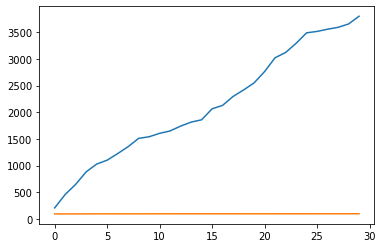

In [ ]:
# Define Parameters
input_size = 784
num_classes = 10 
lr = 0.01
num_epochs = 5

# Create a 1-Layer Neural Network called Net
class Net(nn.Module):
    def __init__(self, input_size, num_classes):
        super(Net,self).__init__()
        self.fc1 = nn.Linear(input_size, 500)
        self.tanh = nn.Tanh()
        self.fc2 = nn.Linear(500, num_classes)
    
    def forward(self,x):
        out = self.fc1(x)
        out = self.tanh(out)
        out = self.fc2(out)
        return out

# Instantiate Model
net = Net(input_size, num_classes)
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
net.to(device)

# Define Loss func and Optimizer
loss_function = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(net.parameters(), lr=lr)

# Train Model
list_loss, list_accuracy = train(model=net, loss_fn=loss_function, optimizer=optimizer, train_loader=train_loader, batch_size=batch_size, num_epochs=num_epochs, input_size=input_size)

# Plot Learning Curves
plot_learning_curve(list_loss = list_loss, list_accuracy = list_accuracy)

# Evaluate on Test Set
test_accuracy(model=net, test_loader=test_loader, input_size=input_size) 

2.6 Batch Size

Batch Size: Question How does changing batch size affect the training process?
Increasing batch size increases computation time but lowers accuracy. Decreasing batch size decreases computation time but increases accuracy.

In [ ]:
batch_size = 50 

train_loader = torch.utils.data.DataLoader(dataset = train_data,
                                             batch_size = batch_size,
                                             shuffle = True)

test_loader = torch.utils.data.DataLoader(dataset = test_data,
                                      batch_size = batch_size, 
                                      shuffle = False)

Epoch [1/5], Step [100/600], Loss: 0.2621, Accuracy: 93.0000
Epoch [1/5], Step [200/600], Loss: 0.3209, Accuracy: 92.5000
Epoch [1/5], Step [300/600], Loss: 0.2417, Accuracy: 93.0000
Epoch [1/5], Step [400/600], Loss: 0.2996, Accuracy: 92.7500
Epoch [1/5], Step [500/600], Loss: 0.1857, Accuracy: 93.4000
Epoch [1/5], Step [600/600], Loss: 0.0938, Accuracy: 94.1667
Epoch [2/5], Step [100/600], Loss: 0.1570, Accuracy: 94.2857
Epoch [2/5], Step [200/600], Loss: 0.1658, Accuracy: 94.1250
Epoch [2/5], Step [300/600], Loss: 0.1993, Accuracy: 94.1111
Epoch [2/5], Step [400/600], Loss: 0.0380, Accuracy: 94.5000
Epoch [2/5], Step [500/600], Loss: 0.0820, Accuracy: 94.7273
Epoch [2/5], Step [600/600], Loss: 0.0579, Accuracy: 95.0833
Epoch [3/5], Step [100/600], Loss: 0.1149, Accuracy: 95.0769
Epoch [3/5], Step [200/600], Loss: 0.0959, Accuracy: 95.2143
Epoch [3/5], Step [300/600], Loss: 0.0553, Accuracy: 95.4000
Epoch [3/5], Step [400/600], Loss: 0.2631, Accuracy: 95.1875
Epoch [3/5], Step [500/6

RuntimeError: ignored

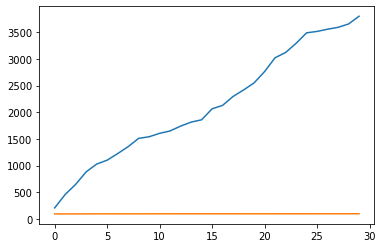

In [ ]:
# Define Parameters
input_size = 784
num_classes = 10 
lr = 0.01
num_epochs = 5

# Create a 1-Layer Neural Network called Net
class Net(nn.Module):
    def __init__(self, input_size, num_classes):
        super(Net,self).__init__()
        self.fc1 = nn.Linear(input_size, 500)
        self.tanh = nn.Tanh()
        self.fc2 = nn.Linear(500, num_classes)
    
    def forward(self,x):
        out = self.fc1(x)
        out = self.tanh(out)
        out = self.fc2(out)
        return out

# Instantiate Model
net = Net(input_size, num_classes)
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
net.to(device)

# Define Loss func and Optimizer
loss_function = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(net.parameters(), lr=lr)

# Train Model
list_loss, list_accuracy = train(model=net, loss_fn=loss_function, optimizer=optimizer, train_loader=train_loader, batch_size=batch_size, num_epochs=num_epochs, input_size=input_size)

# Plot Learning Curves
plot_learning_curve(list_loss = list_loss, list_accuracy = list_accuracy)

# Evaluate on Test Set
test_accuracy(model=net, test_loader=test_loader, input_size=input_size) 

In [ ]:
batch_size = 50 

train_loader = torch.utils.data.DataLoader(dataset = train_data,
                                             batch_size = batch_size,
                                             shuffle = True)

test_loader = torch.utils.data.DataLoader(dataset = test_data,
                                      batch_size = batch_size, 
                                      shuffle = False)

Epoch [1/5], Step [100/600], Loss: 0.2621, Accuracy: 93.0000
Epoch [1/5], Step [200/600], Loss: 0.3209, Accuracy: 92.5000
Epoch [1/5], Step [300/600], Loss: 0.2417, Accuracy: 93.0000
Epoch [1/5], Step [400/600], Loss: 0.2996, Accuracy: 92.7500
Epoch [1/5], Step [500/600], Loss: 0.1857, Accuracy: 93.4000
Epoch [1/5], Step [600/600], Loss: 0.0938, Accuracy: 94.1667
Epoch [2/5], Step [100/600], Loss: 0.1570, Accuracy: 94.2857
Epoch [2/5], Step [200/600], Loss: 0.1658, Accuracy: 94.1250
Epoch [2/5], Step [300/600], Loss: 0.1993, Accuracy: 94.1111
Epoch [2/5], Step [400/600], Loss: 0.0380, Accuracy: 94.5000
Epoch [2/5], Step [500/600], Loss: 0.0820, Accuracy: 94.7273
Epoch [2/5], Step [600/600], Loss: 0.0579, Accuracy: 95.0833
Epoch [3/5], Step [100/600], Loss: 0.1149, Accuracy: 95.0769
Epoch [3/5], Step [200/600], Loss: 0.0959, Accuracy: 95.2143
Epoch [3/5], Step [300/600], Loss: 0.0553, Accuracy: 95.4000
Epoch [3/5], Step [400/600], Loss: 0.2631, Accuracy: 95.1875
Epoch [3/5], Step [500/6

RuntimeError: ignored

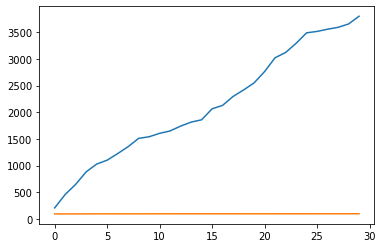

In [ ]:
# Define Parameters
input_size = 784
num_classes = 10 
lr = 0.01
num_epochs = 5

# Create a 1-Layer Neural Network called Net
class Net(nn.Module):
    def __init__(self, input_size, num_classes):
        super(Net,self).__init__()
        self.fc1 = nn.Linear(input_size, 500)
        self.tanh = nn.Tanh()
        self.fc2 = nn.Linear(500, num_classes)
    
    def forward(self,x):
        out = self.fc1(x)
        out = self.tanh(out)
        out = self.fc2(out)
        return out

# Instantiate Model
net = Net(input_size, num_classes)
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
net.to(device)

# Define Loss func and Optimizer
loss_function = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(net.parameters(), lr=lr)

# Train Model
list_loss, list_accuracy = train(model=net, loss_fn=loss_function, optimizer=optimizer, train_loader=train_loader, batch_size=batch_size, num_epochs=num_epochs, input_size=input_size)

# Plot Learning Curves
plot_learning_curve(list_loss = list_loss, list_accuracy = list_accuracy)

# Evaluate on Test Set
test_accuracy(model=net, test_loader=test_loader, input_size=input_size) 

## Network Architectures

You must create a 2-Layer model (```Net2```) and 5-Layer model  (```Net5```) by inheriting from ```nn.Module``` given the architecture in 1.2.1

### Build the 2-Layer model
Network Architecture:
* ***Layer 1***: Convolutional; input channel = 1, output channel = 20, kernel size = 3, step size = 1.
* ***Layer 2***: Fully connected; input dimension = < you find out >, output dimension = < you find out >.

In [ ]:
train_data = datasets.MNIST(root = './data', train = True,
                        transform = transforms.ToTensor(), download = True)

test_data = datasets.MNIST(root = './data', train = False,
                       transform = transforms.ToTensor())

In [ ]:
batch_size = 100 

train_loader = torch.utils.data.DataLoader(dataset = train_data,
                                             batch_size = batch_size,
                                             shuffle = True)

test_loader = torch.utils.data.DataLoader(dataset = test_data,
                                      batch_size = batch_size, 
                                      shuffle = False)

Epoch [1/5], Step [100/600], Loss: 0.3900, Accuracy: 86.0000
Epoch [1/5], Step [200/600], Loss: 0.2586, Accuracy: 90.0000
Epoch [1/5], Step [300/600], Loss: 0.2202, Accuracy: 91.0000
Epoch [1/5], Step [400/600], Loss: 0.1098, Accuracy: 92.7500
Epoch [1/5], Step [500/600], Loss: 0.2493, Accuracy: 92.8000
Epoch [1/5], Step [600/600], Loss: 0.1038, Accuracy: 93.6667
Epoch [2/5], Step [100/600], Loss: 0.1134, Accuracy: 94.0000
Epoch [2/5], Step [200/600], Loss: 0.0746, Accuracy: 94.5000
Epoch [2/5], Step [300/600], Loss: 0.0778, Accuracy: 94.8889
Epoch [2/5], Step [400/600], Loss: 0.0850, Accuracy: 95.1000
Epoch [2/5], Step [500/600], Loss: 0.1105, Accuracy: 95.2727
Epoch [2/5], Step [600/600], Loss: 0.0575, Accuracy: 95.5000
Epoch [3/5], Step [100/600], Loss: 0.0430, Accuracy: 95.6923
Epoch [3/5], Step [200/600], Loss: 0.0522, Accuracy: 95.9286
Epoch [3/5], Step [300/600], Loss: 0.0592, Accuracy: 96.0667
Epoch [3/5], Step [400/600], Loss: 0.0828, Accuracy: 96.0000
Epoch [3/5], Step [500/6

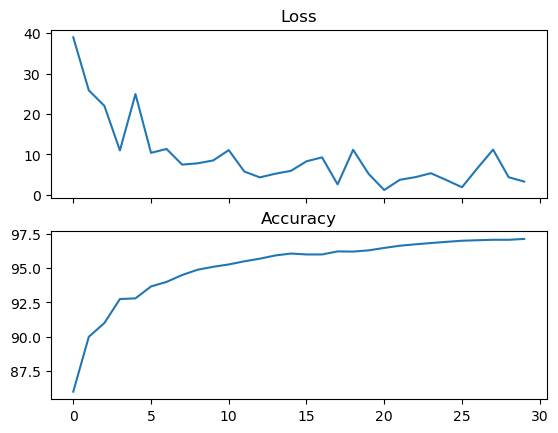

In [ ]:
# Define Parameters
input_size = 784
num_classes = 10 
num_epochs = 5
lr = 1e-3

# Define 2-Layer Network

#parameters self, in_channels, out_channels, kernel_size, stride, padding
class Net2(nn.Module):
    def __init__(self, input_size, num_classes):
        super(Net2,self).__init__()
        self.convolutional_1 = nn.Conv2d(in_channels = 1, out_channels=20, kernel_size=3, stride=1)
        self.relu = nn.ReLU()
        self.fully_convolutional_1 = nn.Linear(26*26*20,num_classes)
        
    def forward(self,x):
        out = self.convolutional_1(x.view(100,1,28,28))
        out = self.relu(out)
        out = self.fully_convolutional_1(out.view(-1,20*26*26))
        return out
    
# Instantiate Model Net2() and load onto GPU
net_2layer = Net2(input_size, num_classes)
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
net_2layer.to(device)

# Define Loss func and Optimizer
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net_2layer.parameters(), lr=lr)

# Train Model
list_loss, list_accuracy = train(model=net_2layer, loss_fn=loss_function, optimizer=optimizer, train_loader=train_loader, batch_size=batch_size, num_epochs=num_epochs, input_size=input_size)

# Plot Learning Curves
plot_learning_curve(list_loss, list_accuracy)

# Evaluate on Test Set
test_accuracy(model=net_2layer, test_loader=test_loader, input_size=input_size) 

### Creating a 5-Layer Model
Similar to the 2-Layer model, make a new class ```Net5```

* ***Layer 1***: Convolutional, input channel = 1, output channel = 32, kernel size = 5, stride = 1, padding = 2.
* ***Layer 2***: Pooling, kernel size = 2, stride = 2.
* ***Layer 3***: Convolutional, input channel = < you find out> , output channel = 64, kernel size = 5, stride = 1 padding = 2.
* ***Layer 4***: Fully connected, input channel = < you find out>, output channel = 1024.
* ***Layer 5***: Fully connected, input channel = < you find out>, < you find out >

Use the same Loss and Optimizer functions are the 2-Layer Model (see 1.2.3)

You will use the same train, test functions from 1.2

[]
[]
Epoch [1/5], Step [100/600], Loss: 0.1289, Accuracy: 98.0000
Epoch [1/5], Step [200/600], Loss: 0.1377, Accuracy: 98.5000
Epoch [1/5], Step [300/600], Loss: 0.0200, Accuracy: 98.6667
Epoch [1/5], Step [400/600], Loss: 0.1267, Accuracy: 98.2500
Epoch [1/5], Step [500/600], Loss: 0.0301, Accuracy: 98.2000
Epoch [1/5], Step [600/600], Loss: 0.0141, Accuracy: 98.5000
Epoch [2/5], Step [100/600], Loss: 0.0192, Accuracy: 98.5714
Epoch [2/5], Step [200/600], Loss: 0.0541, Accuracy: 98.5000
Epoch [2/5], Step [300/600], Loss: 0.1649, Accuracy: 98.5556
Epoch [2/5], Step [400/600], Loss: 0.0035, Accuracy: 98.7000
Epoch [2/5], Step [500/600], Loss: 0.0008, Accuracy: 98.8182
Epoch [2/5], Step [600/600], Loss: 0.0659, Accuracy: 98.6667
Epoch [3/5], Step [100/600], Loss: 0.0586, Accuracy: 98.6154
Epoch [3/5], Step [200/600], Loss: 0.0005, Accuracy: 98.7143
Epoch [3/5], Step [300/600], Loss: 0.0682, Accuracy: 98.6667
Epoch [3/5], Step [400/600], Loss: 0.0027, Accuracy: 98.7500
Epoch [3/5], Step 

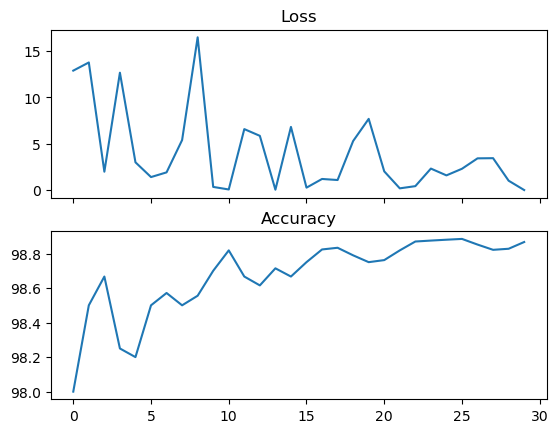

In [ ]:
# Define Parameters
input_size = 784
num_classes = 10 
num_epochs = 5
lr = 1e-4

list_loss = []
list_accuracy = []
print (list_loss)
print (list_accuracy)

# Define 5-Layer Network
class Net5(nn.Module):
    def __init__(self, input_size, num_classes):
        super(Net5,self).__init__()
        self.convolutional_1 = nn.Conv2d(in_channels = 1, out_channels=20, kernel_size=3, stride=1)
        self.pooling = nn.MaxPool2d(kernel_size = 2, stride = 2)
        self.convolutional_2 = nn.Conv2d(in_channels = 1, out_channels=20, kernel_size=3, stride=1)
        self.fully_convolutional_1 = nn.Linear(64,1024)
        self.fully_convolutional_2 = nn.Linear(1024,num_classes)
        self.relu = nn.ReLU()
        
    def forward(self,x):
        out = self.convolutional_1(x.view(100,1,28,28))
        out = self.relu(out)
        out = self.fully_convolutional_1(out.view(-1,20*26*26))
        return out
    
# Instantiate Model Net5() and load onto GPU
net_5layer = Net5(input_size, num_classes)
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
net_5layer.to(device)

# Define Loss func and Optimizer
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=lr)

# Train Model
list_Loss, list_Accuracy = train(model=net, loss_fn=loss_function, optimizer=optimizer, train_loader=train_loader, batch_size=batch_size, num_epochs=num_epochs, input_size=input_size)

# Plot Learning Curves
plot_learning_curve(list_loss = list_Loss, list_accuracy = list_Accuracy)

# Evaluate on Test Set
test_accuracy(model=net, test_loader=test_loader, input_size=input_size) 

Question Explain which model is better and why. Use your learning curves as well as what you
know about model capacity to explain your reasoning.


Question Which model converges to a minimum faster? Why? What hyperparam- eters would
you tune in order to get a model to converge faster?

The 5 layer NN converses to a minimum fastest. It seems to be overfitting to the data and 
learns rapidly compared to the other models. I would probably make the batch size bigger
and learning rate larger so that it converges faster.

Question Explain the purpose of the pooling layer in the 5 layer model.

The pooling layer reduces the number of dimensions to therefore reduce
the overall computation time.

Question Is it possible for a model to have a smaller final loss, even if it has worse test accuracy.

Yes, it can overfit to the training data and as a result do worse on the test accuracy.